In [1]:
# Using the daily K-line data of Maotai's stock, use the opening price of 60 consecutive days to predict the opening price of the 61st day
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout,Dense,LSTM,GRU
from tensorflow.keras.regularizers import l1_l2
import pandas as pd

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error,mean_absolute_error

import math
import os

c:\Users\yatch\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load data
maotai=pd.read_csv('maotaigupiao.csv')
maotai.head()

,Unnamed: 0,date,open,close,high,low,volume,code
0,74,2010-04-26,88.702,87.381,89.072,87.362,107036.13,600519
1,75,2010-04-27,87.355,84.841,87.355,84.681,58234.48,600519
2,76,2010-04-28,84.235,84.318,85.128,83.597,26287.43,600519
3,77,2010-04-29,84.592,85.671,86.315,84.592,34501.20,600519
4,78,2010-04-30,83.871,82.340,83.871,81.523,85566.70,600519


In [4]:
maotai.shape

(2426, 8)

In [5]:
# Top 2126 rows of data as training set, We only use the data of the opening price that is the close column 
training_set=maotai.iloc[:2426-300,3:4].values
# The last 300 rows of data are used as test set
test_set=maotai.iloc[2426-300:,3:4].values

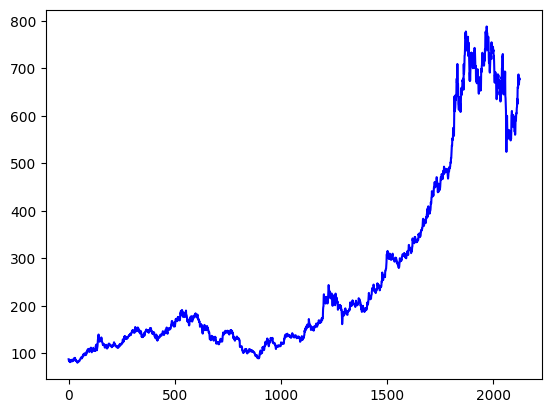

In [7]:
plt.plot(training_set,color='blue',label='Stock Price')

In [143]:
feature=['open','high','low','close','volume']

In [144]:
# MinMaxScaler: Normalization to 0-1
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaler=sc.fit_transform(training_set) 
test_set_scaler=sc.transform(test_set)

In [145]:
training_set_scaler

array([[0.00961659],
       [0.0060261 ],
       [0.00528679],
       ...,
       [0.83672993],
       [0.84690772],
       [0.84309105]])

In [146]:
test_set_scaler

array([[0.8543997 ],
       [0.84167747],
       [0.86090218],
       [0.86524187],
       [0.91136703],
       [0.9009348 ],
       [0.92543217],
       [0.92813211],
       [0.91063197],
       [0.93214668],
       [0.91908519],
       [0.90670221],
       [0.90422845],
       [0.91237067],
       [0.93544032],
       [0.91426487],
       [0.93313619],
       [0.95336454],
       [1.00183624],
       [0.9913192 ],
       [0.98837895],
       [0.97172696],
       [0.94430348],
       [0.92861273],
       [0.95835448],
       [0.93922872],
       [0.95193682],
       [0.98586277],
       [0.98487327],
       [1.0312246 ],
       [1.0065152 ],
       [1.00678378],
       [0.99681803],
       [1.00848007],
       [0.98247018],
       [0.97879487],
       [1.00070538],
       [1.02657392],
       [1.09328082],
       [1.10036287],
       [1.08764063],
       [1.07986594],
       [1.10884435],
       [1.15860242],
       [1.16538761],
       [1.22615748],
       [1.19394196],
       [1.178

In [147]:
x_train,y_train,x_test,y_test=[],[],[],[]  # Create empty list
for i in range(60,len(training_set_scaler)):
    x_train.append(training_set_scaler[i-60:i,0])
    y_train.append(training_set_scaler[i,0])
    pass

# Convert the list to array format for train set

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
np.random.seed(7)

x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],60,1))

In [148]:
# convert the list to array format for test set
for i in range(60,len(test_set_scaler)):
    x_test.append(test_set_scaler[i-60:i,0])
    y_test.append(test_set_scaler[i,0])
    pass

x_test,y_test=np.array(x_test),np.array(y_test)

x_test=np.reshape(x_test,(x_test.shape[0],60,1))

In [149]:
# # Create LSTM model
# model = Sequential()
# model.add(LSTM(units=100, return_sequences=True, input_shape=(60, 1),
#                kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
#                bias_regularizer=l1_l2(l1=1e-4, l2=1e-3)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [150]:
sequence_length = 60
batch_size = 32
epochs = 100
num_units = 128
dropout_rate = 0.2

model = Sequential()
model.add(GRU(num_units, input_shape=(x_train.shape[1], x_train.shape[2]), activation='tanh'))
model.add(Dropout(dropout_rate))
model.add(Dense(units=1))
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [151]:
# Compile model
model.compile(optimizer='adam',# Optimizer
              loss='mean_squared_error') # Loss function

In [152]:
# Train model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, 
          validation_data=(x_train, y_train), callbacks=[early_stopping])
model.summary() # Print model structure

Epoch 1/100


65/65 [==============================] - 5s 52ms/step - loss: 0.0104 - val_loss: 2.6944e-04
Epoch 2/100
65/65 [==============================] - 4s 64ms/step - loss: 9.6519e-04 - val_loss: 1.8543e-04
Epoch 3/100
65/65 [==============================] - 4s 69ms/step - loss: 7.2867e-04 - val_loss: 2.1452e-04
Epoch 4/100
65/65 [==============================] - 5s 71ms/step - loss: 7.2816e-04 - val_loss: 2.3790e-04
Epoch 5/100
65/65 [==============================] - 4s 59ms/step - loss: 7.2209e-04 - val_loss: 2.1705e-04
Epoch 6/100
65/65 [==============================] - 5s 75ms/step - loss: 7.5292e-04 - val_loss: 1.7569e-04
Epoch 7/100
65/65 [==============================] - 4s 67ms/step - loss: 5.9104e-04 - val_loss: 1.9405e-04
Epoch 8/100
65/65 [==============================] - 5s 73ms/step - loss: 5.8907e-04 - val_loss: 1.5847e-04
Epoch 9/100
65/65 [==============================] - 4s 64ms/step - loss: 5.7394e-04 - val_loss: 1.8470e-04
Epoch 10/100
65/65 [========================

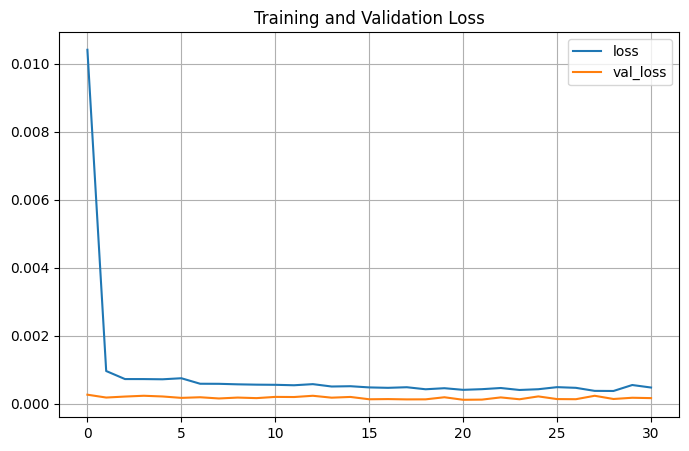

In [155]:
# Draw the loss curve
data={}
data['loss']=history.history['loss']

data['val_loss']=history.history['val_loss']
pd.DataFrame(data).plot(figsize=(8,5))
plt.grid(True)
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

8/8 [==============================] - 0s 17ms/step


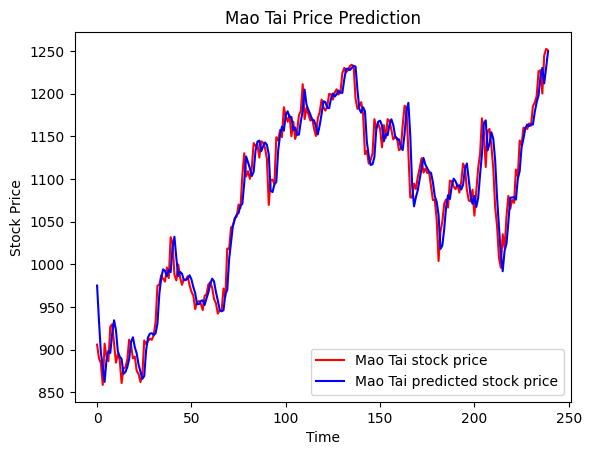

In [156]:
# Predict stock price of test set 
predicted_stock_price=model.predict(x_test)
# Inverse normalization to get the real stock price 
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

# Get the real stock price of test set
real_stock_price=sc.inverse_transform(test_set_scaler[60:])
real_stock_price
# Calculate the RMSE value

plt.plot(real_stock_price,color='red',label='Mao Tai stock price') #Truth value is red line

plt.plot(predicted_stock_price,color='blue',label='Mao Tai predicted stock price') #Predicted value is blue line

plt.title('Mao Tai Price Prediction')

plt.xlabel('Time')

plt.ylabel('Stock Price')

plt.legend()
plt.show()

In [157]:
# Calculate the RMSE value
mse=mean_squared_error(predicted_stock_price,real_stock_price)
rmse=math.sqrt(mse)

print('MSE :%.6f'%mse)
print('RMSE :%.6f'%rmse)

MSE :450.874595
RMSE :21.233808
